## project_nutrients_review_negative

In [1]:
import numpy as np

In [2]:
# project_nutrients_review_negative.csv
import pandas as pd
df_review_negative = pd.read_csv('../datasets/reviews_data/all_preprocess_negative.csv')

In [3]:
df_review_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       4821 non-null   int64  
 1   Unnamed: 0         4821 non-null   int64  
 2   product_name       4821 non-null   object 
 3   review_date        4821 non-null   object 
 4   review_content     4821 non-null   object 
 5   review_star        4821 non-null   float64
 6   review_writer      4821 non-null   object 
 7   tokenized_reviews  4821 non-null   object 
 8   replaced_review    4326 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 339.1+ KB


In [4]:
df_review_negative = df_review_negative.dropna()

### LDA 분석

##### 문장 벡터화

In [5]:
from gensim.corpora import Dictionary

In [6]:
type(df_review_negative['replaced_review'])

pandas.core.series.Series

In [7]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_review_negative['replaced_review'] = df_review_negative['replaced_review'].astype(str)

In [8]:
negative_review = df_review_negative['replaced_review'].apply(lambda x: x.split()).values

In [9]:
type(negative_review) 

numpy.ndarray

In [10]:
negative_review

array([list(['빨르다', '생리', '증후군', '좋다', '주문', '솔직하다', '좋다', '느끼다', '그런데', '중단', '생리', '전이', '무지', '힘들다', '보라', '지유', '복용', '괜찮다', '급하다', '주문', '다시', '제대로']),
       list(['빨르다', '아직', '효능', '모르다', '꾸준하다', '복용', '재다', '정확하다', '상품', '남다']),
       list(['별로', '감마', '리놀렌산', '효능', '어떻다', '제약회사', '제품', '여성', '갱년기', '유독', '상품', '가격', '높다', '회사', '비교', '감마', '리놀렌산', '함유', '높다', '가격', '높다', '회사', '제품', '가격', '새다', '모르다', '올리다', '놨네', '캡슐', '판매', '캡슐', '줄이다', '괘씸하다', '다시다', '구입']),
       ..., list(['빨르다', '제품', '섭취', '한지', '좋다', '겠다']),
       list(['빨르다', '별로', '박스', '피로', '회복', '안되다', '드네']),
       list(['빨르다', '별로', '호불호', '모르다', '먹기', '포기'])], dtype=object)

In [11]:
dictionary = Dictionary(negative_review)
dictionary

In [12]:
dictionary.doc2bow(negative_review[3])

[(8, 1), (13, 2), (27, 1), (50, 1), (51, 1), (52, 1), (53, 1)]

In [13]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in negative_review :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [14]:
df_review_negative['문장벡터화'] = corpus_list

In [15]:
df_review_negative.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'product_name', 'review_date',
       'review_content', 'review_star', 'review_writer', 'tokenized_reviews',
       'replaced_review', '문장벡터화'],
      dtype='object')

##### 토픽 잡기
- review_negative.csv 토픽 분석
- 토픽 수 3

In [16]:
from gensim.models import LdaModel

In [17]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [18]:
lda_model.print_topics(num_words=4)

[(0, '0.093*"좋다" + 0.027*"빨르다" + 0.020*"제품" + 0.017*"구매"'),
 (1, '0.128*"가격" + 0.104*"괜찮다" + 0.074*"빨르다" + 0.038*"상태"'),
 (2, '0.034*"모르다" + 0.029*"아직" + 0.023*"느리다" + 0.021*"빨르다"'),
 (3, '0.021*"구매" + 0.020*"빨르다" + 0.020*"제품" + 0.020*"복용"')]

##### 최적에 토픽 단어 수

In [19]:
sentences = df_review_negative['replaced_review']
sentences

0       빨르다 생리 증후군 좋다 주문 솔직하다 좋다 느끼다 그런데 중단 생리 전이 무지 힘...
1                     빨르다 아직 효능 모르다 꾸준하다 복용 재다 정확하다 상품 남다
2       별로 감마 리놀렌산 효능 어떻다 제약회사 제품 여성 갱년기 유독 상품 가격 높다 회...
3                          빨르다 뛰어나다 가격 저렴하다 좋다 확실하다 좋다 차이
4                                    가격 싸다 라보 좋다 식품 젊다 싶다
                              ...                        
4816                                      빨르다 가족 가격 부담스럽다
4817                                                   좋다
4818                                   빨르다 제품 섭취 한지 좋다 겠다
4819                               빨르다 별로 박스 피로 회복 안되다 드네
4820                                 빨르다 별로 호불호 모르다 먹기 포기
Name: replaced_review, Length: 4326, dtype: object

In [20]:
type(sentences)

pandas.core.series.Series

In [21]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [22]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['빨르다',
  '생리',
  '증후군',
  '좋다',
  '주문',
  '솔직하다',
  '좋다',
  '느끼다',
  '그런데',
  '중단',
  '생리',
  '전이',
  '무지',
  '힘들다',
  '보라',
  '지유',
  '복용',
  '괜찮다',
  '급하다',
  '주문',
  '다시',
  '제대로'],
 ['빨르다', '아직', '효능', '모르다', '꾸준하다', '복용', '재다', '정확하다', '상품', '남다'],
 ['별로',
  '감마',
  '리놀렌산',
  '효능',
  '어떻다',
  '제약회사',
  '제품',
  '여성',
  '갱년기',
  '유독',
  '상품',
  '가격',
  '높다',
  '회사',
  '비교',
  '감마',
  '리놀렌산',
  '함유',
  '높다',
  '가격',
  '높다',
  '회사',
  '제품',
  '가격',
  '새다',
  '모르다',
  '올리다',
  '놨네',
  '캡슐',
  '판매',
  '캡슐',
  '줄이다',
  '괘씸하다',
  '다시다',
  '구입'],
 ['빨르다', '뛰어나다', '가격', '저렴하다', '좋다', '확실하다', '좋다', '차이'],
 ['가격', '싸다', '라보', '좋다', '식품', '젊다', '싶다'],
 ['크기', '커서', '넘김', '힘드다'],
 ['뛰어나다', '비싸다', '이렇게', '빨리', '떨어지다', '깔다', '살다', '부담스럽다', '가격'],
 ['빨르다', '별로', '전혀'],
 ['혈액',
  '순환',
  '도움',
  '감마',
  '리놀렌산',
  '달맞이',
  '자유',
  '구입',
  '꾸준하다',
  '복용',
  '아직',
  '크게',
  '보지',
  '의아',
  '아직',
  '충분하다',
  '제품',
  '교체',
  '복용',
  '절임',
  '개선',
  '안될런'],
 ['꾸준하다', '생리', '주기', '늘어나다'],
 ['가격', '맞다', 

In [23]:
preprocessed_sentences = morphs_list

In [24]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [25]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.379705103247427

In [26]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-7.170768827537787

In [27]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [28]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.336681,-7.039051
1,0.389467,-7.090486
2,0.392069,-7.204642
3,0.408913,-7.212233
4,0.353812,-7.295254
5,0.380771,-7.370035
6,0.365511,-7.466269
7,0.374692,-7.629780
8,0.396601,-7.750135


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

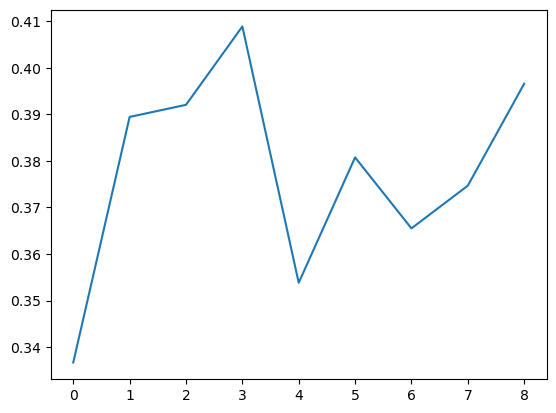

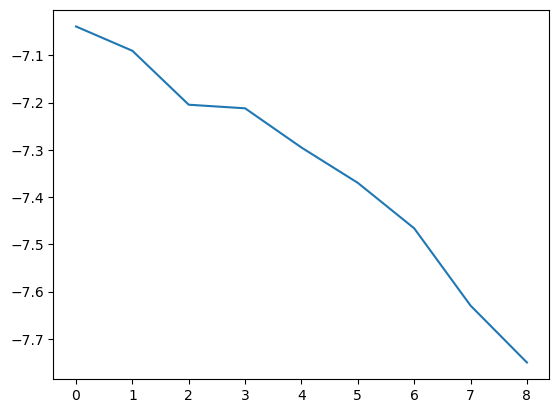

In [30]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [31]:
# %pip install pyLDAvis

In [32]:
# word_count_in_dictionary = len(dictionary.token2id)
# print("dictionary 객체의 단어 수:", word_count_in_dictionary)

In [33]:
# word_count_in_corpus = sum(len(doc) for doc in corpus_list)
# print("corpus_list의 전체 단어 수:", word_count_in_corpus)

In [34]:
# if word_count_in_dictionary == word_count_in_corpus:
#     print("dictionary와 corpus_list의 단어 수가 일치합니다.")
# else:
#     print("주의: dictionary와 corpus_list의 단어 수가 일치하지 않습니다.")

In [35]:
import pyLDAvis.gensim_models

In [36]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [37]:
pyLDAvis.display(result_visualized)

In [38]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, '../project_nutrients_review_negative_result_visualized.html')